In [1]:
import pandas as pd
data = pd.read_csv('completat422.csv', low_memory=False)
data.columns

Index(['loc', 'mun', 'est', 'est.1', 'est.2', 'ageb', 't', 't.1', 'cd_a',
       'ent',
       ...
       'p9_m5', 'p9_6', 'p9_h6', 'p9_m6', 'p9_7', 'p9_h7', 'p9_m7', 'p9_8',
       'p9_h8', 'p9_m8'],
      dtype='object', length=350)

In [2]:
tabla_segsoc = data[['seg_soc']]
tabla_segsoc = tabla_segsoc['seg_soc'].value_counts().reset_index()
tabla_segsoc['seg_soc'] = tabla_segsoc['seg_soc'].map({0.0:'No aplica', 1.0:'Con acceso', 2.0:'Sin acceso', 3.0:'No especificado'})
tabla_segsoc
# data.groupby(['seg_soc']).size().reset_index(name='count')

,index,seg_soc
0,0.0,NaN
1,2.0,NaN
2,1.0,NaN
3,3.0,NaN


In [3]:
print('Cada cuanto le pagan al trabajador')
periodo_pago = data.groupby(['p6b1']).size().reset_index(name='count')
periodo_pago['p6b1'] = periodo_pago['p6b1'].map({1:"Cada mes",2:"Cada 15 días",3:"Cada semana",4:"Diario",
                                                 5:"Otro periodo de pago",
                                                 6:"Le pagan por pieza producida o vendida, servicio u obra realizada",
                                                 7:"No supo estimar",8:"Se negó a contestar esta pregunta"})
periodo_pago

Cada cuanto le pagan al trabajador


,p6b1,count
0,Cada mes,11018
1,Cada 15 días,25909
2,Cada semana,63776
3,Diario,19072
4,Otro periodo de pago,2561
5,"Le pagan por pieza producida o vendida, servic...",541
6,No supo estimar,37785
7,Se negó a contestar esta pregunta,10856


In [4]:
entidad = data.groupby(['ent']).size().reset_index()
entidad['ent'] = entidad['ent'].map({1:"Aguascalientes",
                                    2:"Baja California", 3:"Baja California Sur", 4:"Campeche",5:"Coahuila",6:"Colima",7:"Chiapas",
                                    8:"Chihuahua",9:"Ciudad de México",10:"Durango",11:"Guanajuato",12:"Guerrero",13:"Hidalgo",
                                    14:"Jalisco",15:"México",16:"Michoacán",17:"Morelos",18:"Nayarit",19:"Nuevo León",20:"Oaxaca",
                                    21:"Puebla",22:"Querétaro",23:"Quintana Roo",24:"San Luis Potosí",25:"Sinaloa",26:"Sonora",
                                    27:"Tabasco",28:"Tamaulipas",29:"Tlaxcala",30:"Veracruz",31:"Yucatán",32:"Zacatecs"})
entidad

,ent,0
0,Aguascalientes,8952
1,Baja California,12216
2,Baja California Sur,6334
3,Campeche,12086
4,Coahuila,12652
5,Colima,7570
6,Chiapas,15376
7,Chihuahua,11891
8,Ciudad de México,7394
9,Durango,9923


In [5]:
percent = []
e_count=322870
for i in entidad[0]:
    percent.append(round((i/e_count)*100, 2))
entidad['Porcentaje'] = percent

In [6]:
entidad.sort_values(by = 0)

,ent,0,Porcentaje
2,Baja California Sur,6334,1.96
22,Quintana Roo,7357,2.28
8,Ciudad de México,7394,2.29
5,Colima,7570,2.34
16,Morelos,8012,2.48
12,Hidalgo,8044,2.49
25,Sonora,8221,2.55
17,Nayarit,8685,2.69
21,Querétaro,8890,2.75
30,Yucatán,8904,2.76


In [7]:
print('posicion en la ocupación')
posicion = data.groupby(['pos_ocu']).size().reset_index()
posicion['pos_ocu'] = posicion['pos_ocu'].map({0:'No aplica',1:'Trabajadores subordinados y remunerados',
                                              2:'Empleadores',3:'Trabajadores por cuenta propia',4:'Trabajadores sin pago',
                                              5:'No especificado'})
posicion

posicion en la ocupación


,pos_ocu,0
0,No aplica,142183
1,Trabajadores subordinados y remunerados,127233
2,Empleadores,9418
3,Trabajadores por cuenta propia,37109
4,Trabajadores sin pago,6927


In [8]:
# Asegurados según rama o sector laboral
asegurados = data.copy()
asegurados = asegurados[(asegurados["imssissste"]!=0) & (asegurados["rama"]!=0)]
asegurados['rama'] = asegurados['rama'].map({0:"No aplica",6:"Agropecuario",1:"Construcción",
                                         2:"Industria manufacturera",3:"Comercio",4:"Servicios",5:"Otros",7:"No especificado"})
asegurados['imssissste'] = asegurados['imssissste'].map({0:"No aplica", 1:'Imss', 2:'Issste',
                                                         3:'Otras instituciones',4:'No recibe atención médica', 5:'No especificado'})
aseg_tab = pd.crosstab(asegurados['imssissste'], asegurados['rama'])
aseg_tab['Total'] = aseg_tab.sum(axis=1)
aseg_tab = aseg_tab._append(aseg_tab.sum().rename('Total'), ignore_index=False)
aseg_tab = aseg_tab.sort_values(by='Total')
aseg_tab

rama,Agropecuario,Comercio,Construcción,Industria manufacturera,No especificado,Otros,Servicios,Total
imssissste,,,,,,,,
Otras instituciones,23,41,4,58,2,13,1025,1166
No especificado,20,133,51,109,690,8,518,1529
Issste,5,21,8,200,3,345,11548,12130
Imss,1378,12956,3150,18554,139,1151,26777,64105
No recibe atención médica,13030,22295,11172,10938,459,174,43689,101757
Total,14456,35446,14385,29859,1293,1691,83557,180687


Text(0, 0.5, 'Encuestados')

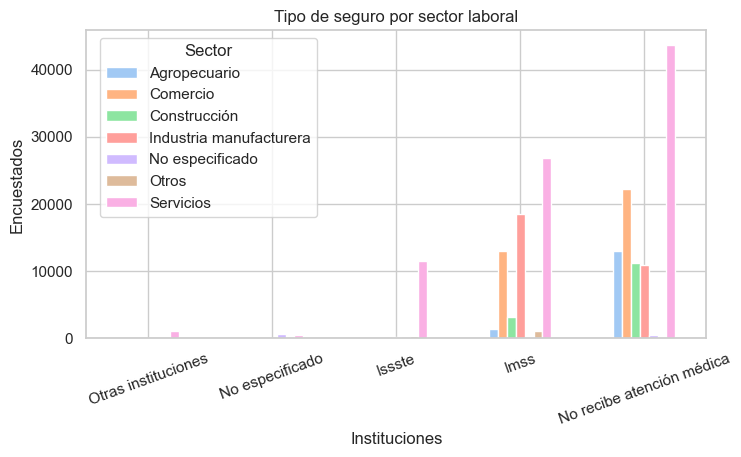

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid",palette='pastel')
asbp = aseg_tab.iloc[:5,:7]

fig, ax = plt.subplots(figsize=(8,4))
asbp.plot(kind="bar", rot=0, ax=ax)

ax.legend(title='Sector', bbox_to_anchor=(0.01,1), loc="upper left")
ax.tick_params(axis='x', rotation=20)
ax.set_title('Tipo de seguro por sector laboral')
ax.set_xlabel('Instituciones')
ax.set_ylabel('Encuestados')



In [10]:
asbp = aseg_tab.iloc[:5,:7]
ej_heat = asbp.div(asbp.sum(axis=0), axis=1)*100
# ej_heat['Total'] = ej_heat.sum(axis=1)
ej_heat = ej_heat._append(ej_heat.sum().rename('Total'), ignore_index=False)
ej_heat

rama,Agropecuario,Comercio,Construcción,Industria manufacturera,No especificado,Otros,Servicios
imssissste,,,,,,,
Otras instituciones,0.159103,0.115669,0.027807,0.194246,0.154679,0.768776,1.226708
No especificado,0.138351,0.375219,0.354536,0.365049,53.364269,0.473093,0.619936
Issste,0.034588,0.059245,0.055613,0.669815,0.232019,20.402129,13.820506
Imss,9.532374,36.551374,21.897810,62.138719,10.750193,68.066233,32.046387
No recibe atención médica,90.135584,62.898493,77.664234,36.632171,35.498840,10.289769,52.286463
Total,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


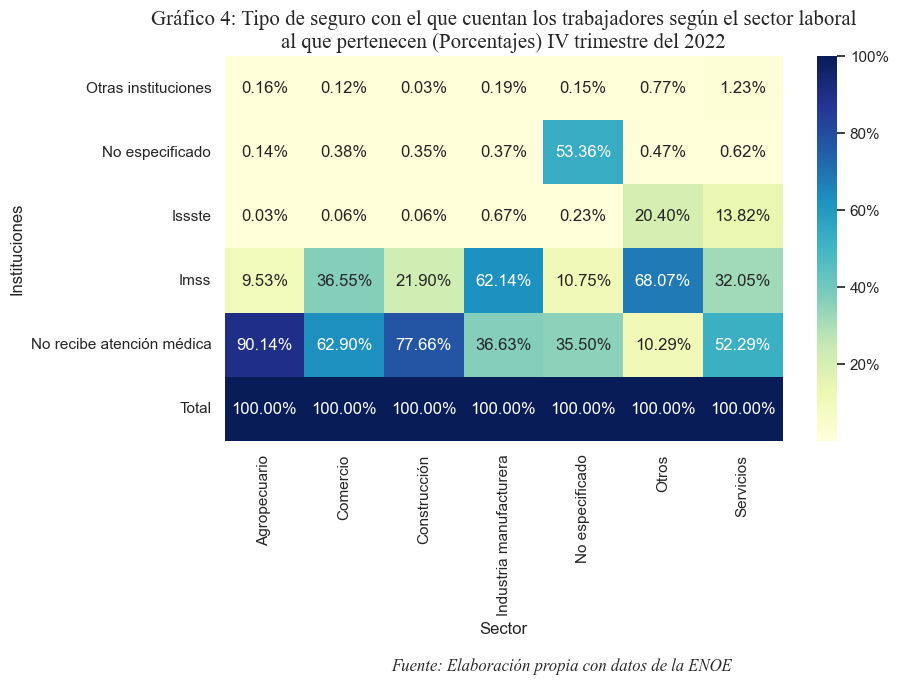

In [11]:
plt.figure(figsize=(9, 5))
heat = sns.heatmap(ej_heat, annot=True, fmt="0.2f", cmap="YlGnBu", cbar_kws={'format': '%.0f%%'})

for text in heat.texts:
    text.set_text(text.get_text() + '%')
    
font_t = {'family': 'Times New Roman', 'fontsize': 15}
font_p = {'family': 'Times New Roman', 'style': 'italic', 'fontsize': 12}

plt.title('Gráfico 4: Tipo de seguro con el que cuentan los trabajadores según el sector laboral\n'
          'al que pertenecen (Porcentajes) IV trimestre del 2022', fontdict=font_t)
plt.xlabel('Sector')
plt.ylabel('Instituciones')
plt.figtext(0.5, -0.35, 'Fuente: Elaboración propia con datos de la ENOE', ha='center', fontdict=font_p)
# plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig('inst_rama.png', bbox_inches='tight')

In [2]:
import numpy as np
data_c = data.copy() 
# Condición para la nueva columna 'ingocup2'
condition = (data_c['pos_ocu'] != 4) & (data_c['p6b1'] > 6) & (data_c['ingocup'] == 0)
# Aplicar la condición y asignar valores a 'ingocup2' según la condición
data_c['ingocup2'] = np.where(condition, np.nan, data_c['ingocup'])
data_c.head(5)

,loc,mun,est,est.1,est.2,ageb,t,t.1,cd_a,ent,...,p9_6,p9_h6,p9_m6,p9_7,p9_h7,p9_m7,p9_8,p9_h8,p9_m8,ingocup2
0,NaN,1.0,30.0,2.0,NaN,0.0,1.0,NaN,14.0,1.0,...,NaN,NaN,NaN,7.0,28.0,0.0,NaN,NaN,NaN,2580.0
1,NaN,1.0,30.0,2.0,NaN,0.0,1.0,NaN,14.0,1.0,...,NaN,NaN,NaN,7.0,3.0,0.0,NaN,NaN,NaN,9600.0
2,NaN,1.0,30.0,2.0,NaN,0.0,1.0,NaN,14.0,1.0,...,NaN,NaN,NaN,7.0,3.0,0.0,NaN,NaN,NaN,9600.0
3,NaN,1.0,30.0,2.0,NaN,0.0,1.0,NaN,14.0,1.0,...,NaN,NaN,NaN,7.0,2.0,0.0,NaN,NaN,NaN,6880.0
4,NaN,1.0,30.0,2.0,NaN,0.0,1.0,NaN,14.0,1.0,...,NaN,NaN,NaN,7.0,35.0,0.0,NaN,NaN,NaN,0.0


In [11]:
data_c

,loc,mun,est,est.1,est.2,ageb,t,t.1,cd_a,ent,...,p9_6,p9_h6,p9_m6,p9_7,p9_h7,p9_m7,p9_8,p9_h8,p9_m8,ingocup2
0,NaN,1.0,30.0,2.0,NaN,0.0,1.0,NaN,14.0,1.0,...,NaN,NaN,NaN,7.0,28.0,0.0,NaN,NaN,NaN,2580.0
1,NaN,1.0,30.0,2.0,NaN,0.0,1.0,NaN,14.0,1.0,...,NaN,NaN,NaN,7.0,3.0,0.0,NaN,NaN,NaN,9600.0
2,NaN,1.0,30.0,2.0,NaN,0.0,1.0,NaN,14.0,1.0,...,NaN,NaN,NaN,7.0,3.0,0.0,NaN,NaN,NaN,9600.0
3,NaN,1.0,30.0,2.0,NaN,0.0,1.0,NaN,14.0,1.0,...,NaN,NaN,NaN,7.0,2.0,0.0,NaN,NaN,NaN,6880.0
4,NaN,1.0,30.0,2.0,NaN,0.0,1.0,NaN,14.0,1.0,...,NaN,NaN,NaN,7.0,35.0,0.0,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322865,NaN,2.0,20.0,476.0,420.0,0.0,4.0,4.0,86.0,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
322866,NaN,2.0,20.0,476.0,420.0,0.0,4.0,4.0,86.0,32.0,...,NaN,NaN,NaN,7.0,14.0,0.0,NaN,NaN,NaN,0.0
322867,NaN,2.0,20.0,476.0,420.0,0.0,4.0,4.0,86.0,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,583.0
322868,NaN,2.0,20.0,476.0,420.0,0.0,4.0,4.0,86.0,32.0,...,NaN,NaN,NaN,7.0,21.0,0.0,NaN,NaN,NaN,0.0


In [13]:
data_c = data_c[data_c['ingocup2']>0]
data_c['ingocup2'].describe()

count    122877.000000
mean       8491.621451
std        7290.195178
min          30.000000
25%        4945.000000
50%        7000.000000
75%       10000.000000
max      300000.000000
Name: ingocup2, dtype: float64

In [14]:
data_c

,loc,mun,est,est.1,est.2,ageb,t,t.1,cd_a,ent,...,p9_6,p9_h6,p9_m6,p9_7,p9_h7,p9_m7,p9_8,p9_h8,p9_m8,ingocup2
0,NaN,1.0,30.0,2.0,NaN,0.0,1.0,NaN,14.0,1.0,...,NaN,NaN,NaN,7.0,28.0,0.0,NaN,NaN,NaN,2580.0
1,NaN,1.0,30.0,2.0,NaN,0.0,1.0,NaN,14.0,1.0,...,NaN,NaN,NaN,7.0,3.0,0.0,NaN,NaN,NaN,9600.0
2,NaN,1.0,30.0,2.0,NaN,0.0,1.0,NaN,14.0,1.0,...,NaN,NaN,NaN,7.0,3.0,0.0,NaN,NaN,NaN,9600.0
3,NaN,1.0,30.0,2.0,NaN,0.0,1.0,NaN,14.0,1.0,...,NaN,NaN,NaN,7.0,2.0,0.0,NaN,NaN,NaN,6880.0
5,NaN,1.0,30.0,2.0,NaN,0.0,1.0,NaN,14.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7740.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322858,NaN,2.0,20.0,476.0,420.0,0.0,4.0,4.0,86.0,32.0,...,NaN,NaN,NaN,7.0,21.0,0.0,NaN,NaN,NaN,2150.0
322860,NaN,2.0,20.0,476.0,420.0,0.0,4.0,4.0,86.0,32.0,...,NaN,NaN,NaN,7.0,7.0,0.0,NaN,NaN,NaN,7740.0
322863,NaN,2.0,20.0,476.0,420.0,0.0,4.0,4.0,86.0,32.0,...,NaN,NaN,NaN,7.0,7.0,0.0,NaN,NaN,NaN,7740.0
322864,NaN,2.0,20.0,476.0,420.0,0.0,4.0,4.0,86.0,32.0,...,NaN,NaN,NaN,7.0,21.0,0.0,NaN,NaN,NaN,7955.0


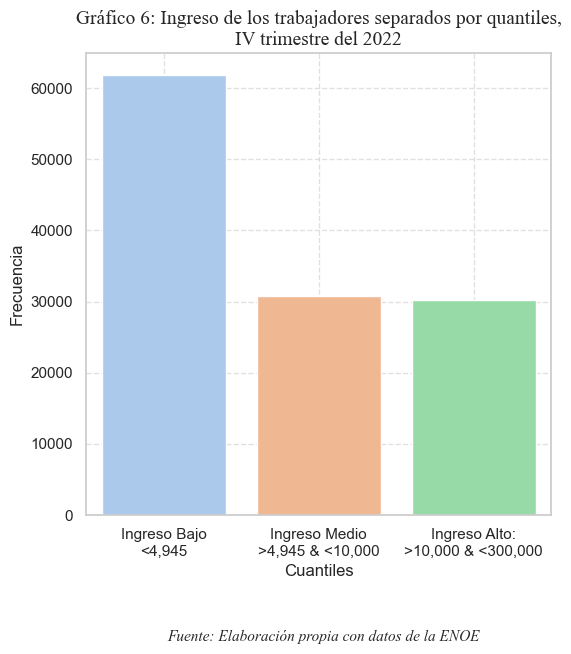

In [14]:
ing = data_c.copy()
ing["quantiles"]= pd.qcut(data_c['ingocup2'], q=[0, 0.25, 0.75, 1], labels = ['Ingreso Bajo\n'
                                                                              '<4,945', 
                                                                              'Ingreso Medio\n'
                                                                              '>4,945 & <10,000', 
                                                                              'Ingreso Alto:\n'
                                                                              '>10,000 & <300,000'])
#Configuación del Gráfico
fig, ax = plt.subplots(figsize=(6,6))
sns.barplot(x = ing['quantiles'].unique(), y = ing['quantiles'].value_counts())
# Titulos y pies de gráfico
font_t = {'family': 'Times New Roman', 'fontsize': 14}
font_p = {'family': 'Times New Roman', 'style': 'italic', 'fontsize': 11}
# Titulo
plt.title('Gráfico 6: Ingreso de los trabajadores separados por quantiles,\n'
          'IV trimestre del 2022', fontdict=font_t)
# Etiquetas de ejes
plt.xlabel('Cuantiles')
plt.ylabel('Frecuencia')
# Pié de gráfico
plt.figtext(0.52, -0.1, 'Fuente: Elaboración propia con datos de la ENOE', ha='center', fontdict=font_p)
ax.grid(True, linestyle='--', alpha=0.6)
# Guardar imagen
plt.savefig('ing_quants.png', bbox_inches='tight')

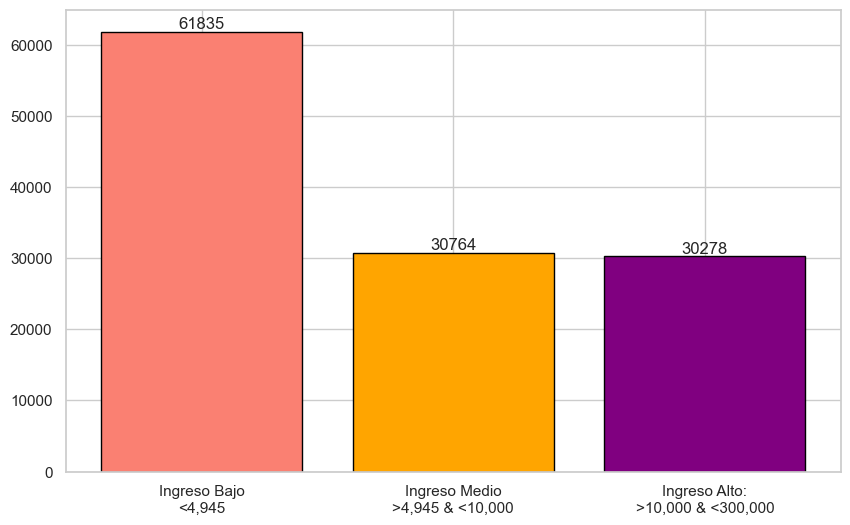

In [15]:
# sns.barplot(x = ing['quantiles'].unique(), y = ing['quantiles'].value_counts())
fig, ax = plt.subplots(figsize=(10, 6))  # Aumentar el tamaño de la figura

# Crear la gráfica de barras
bars = ax.bar(ing['quantiles'].unique(), ing['quantiles'].value_counts(), color=['salmon', 'orange', 'purple'], edgecolor='black')

# Añadir etiquetas a las barras
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom')

# Ajustar el rango de los ejes
# ax.set_ylim(0, max(values) + 5) 

In [16]:
data_cc = data_c[(data_c['ingocup2']>0)&(data_c['clase1']==1)]
prest_df = data_cc[['ing_x_hrs','clase1','pos_ocu', 'p6b1','medica5c','hrsocup','ingocup2', 't_tra','p3k1','p3k2','p3k3','p3k4','p3k5','p3k9']].reset_index(drop=True)
# prest_df = prest_df.rename(columns={'p3k1':"Aguinaldo",
#                                     'p3k2':"Vacaciones con goce de sueldo",
#                                     'p3k3':"Reparto de utilidades",
#                                     'p3k4':"Ninguna de las anteriores",
#                                     'p3k5':'No le dan nada',
#                                     'p3k9':'No sabe'})
prest_df

,ing_x_hrs,clase1,pos_ocu,p6b1,medica5c,hrsocup,ingocup2,t_tra,p3k1,p3k2,p3k3,p3k4,p3k5,p3k9
0,50.00000,1.0,1.0,3.0,1.0,12.0,2580.0,1.0,NaN,NaN,NaN,NaN,5.0,NaN
1,47.50124,1.0,1.0,2.0,3.0,47.0,9600.0,1.0,1.0,2.0,3.0,NaN,NaN,NaN
2,46.51163,1.0,1.0,2.0,3.0,48.0,9600.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN
3,33.33333,1.0,1.0,3.0,3.0,48.0,6880.0,1.0,1.0,2.0,3.0,NaN,NaN,NaN
4,25.00000,1.0,1.0,4.0,1.0,72.0,7740.0,1.0,NaN,NaN,NaN,NaN,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122872,10.00000,1.0,1.0,3.0,1.0,50.0,2150.0,2.0,NaN,NaN,NaN,NaN,5.0,NaN
122873,36.00000,1.0,1.0,3.0,1.0,50.0,7740.0,2.0,NaN,NaN,NaN,NaN,5.0,NaN
122874,37.50000,1.0,1.0,3.0,2.0,48.0,7740.0,1.0,NaN,NaN,NaN,NaN,5.0,NaN
122875,30.83333,1.0,1.0,3.0,1.0,60.0,7955.0,1.0,NaN,NaN,NaN,NaN,5.0,NaN


In [17]:
prest_df_1 = prest_df.fillna(0)
prest_df_1.isna().sum()

ing_x_hrs    0
clase1       0
pos_ocu      0
p6b1         0
medica5c     0
hrsocup      0
ingocup2     0
t_tra        0
p3k1         0
p3k2         0
p3k3         0
p3k4         0
p3k5         0
p3k9         0
dtype: int64

In [18]:
un = prest_df.iloc[:,7:]
data_dum = prest_df[['p3k1','p3k2','p3k3','p3k4','p3k5','p3k9']]
for columns in data_dum:
    data_dum[columns] = pd.get_dummies(un[columns])

data_dum = data_dum.rename(columns={'p3k1':"Aguinaldo",
                                    'p3k2':"Vacaciones con goce de sueldo",
                                    'p3k3':"Reparto de utilidades",
                                    'p3k4':"Ninguna de las anteriores",
                                    'p3k5':'No le dan nada',
                                    'p3k9':'No sabe'})
prest_df_1 = pd.concat([prest_df, data_dum], axis=1, ignore_index=False)
prest_df_1 = prest_df_1.drop(['p3k1','p3k2','p3k3','p3k4','p3k5','p3k9'], axis=1)

prest_df_1

C:\Users\Adrián Vázquez\AppData\Local\Temp\ipykernel_3896\2281763421.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dum[columns] = pd.get_dummies(un[columns])


,ing_x_hrs,clase1,pos_ocu,p6b1,medica5c,hrsocup,ingocup2,t_tra,Aguinaldo,Vacaciones con goce de sueldo,Reparto de utilidades,Ninguna de las anteriores,No le dan nada,No sabe
0,50.00000,1.0,1.0,3.0,1.0,12.0,2580.0,1.0,0,0,0,0,1,0
1,47.50124,1.0,1.0,2.0,3.0,47.0,9600.0,1.0,1,1,1,0,0,0
2,46.51163,1.0,1.0,2.0,3.0,48.0,9600.0,1.0,1,1,0,0,0,0
3,33.33333,1.0,1.0,3.0,3.0,48.0,6880.0,1.0,1,1,1,0,0,0
4,25.00000,1.0,1.0,4.0,1.0,72.0,7740.0,1.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122872,10.00000,1.0,1.0,3.0,1.0,50.0,2150.0,2.0,0,0,0,0,1,0
122873,36.00000,1.0,1.0,3.0,1.0,50.0,7740.0,2.0,0,0,0,0,1,0
122874,37.50000,1.0,1.0,3.0,2.0,48.0,7740.0,1.0,0,0,0,0,1,0
122875,30.83333,1.0,1.0,3.0,1.0,60.0,7955.0,1.0,0,0,0,0,1,0


In [19]:

prest_df_1.iloc[:,4:].to_csv('df_fuzzy.csv', index=False)

In [20]:
urb_rur = data['ur'].value_counts().reset_index()
urb_rur['ur'] = urb_rur['ur'].map({1:"Muestra urbana",2:"Muestra complemento y rural"})
urb_rur

,index,ur
0,1.0,NaN
1,2.0,NaN


In [21]:
df_k = data_cc[['medica5c','rama','ing_x_hrs','clase1','pos_ocu', 'p6b1', 'hrsocup','ingocup2', 't_tra','p3k1','p3k2','p3k3','p3k4','p3k5','p3k9']].reset_index(drop=True)
# df_k = df_k.rename(columns={'p3k1':"Aguinaldo",
#                             'p3k2':"Vacaciones con goce de sueldo",
#                             'p3k3':"Reparto de utilidades",
#                             'p3k4':"Ninguna de las anteriores",
#                             'p3k5':'No le dan nada',
#                             'p3k9':'No sabe'})
df_k = df_k.fillna(0)
df_k

,medica5c,rama,ing_x_hrs,clase1,pos_ocu,p6b1,hrsocup,ingocup2,t_tra,p3k1,p3k2,p3k3,p3k4,p3k5,p3k9
0,1.0,4.0,50.00000,1.0,1.0,3.0,12.0,2580.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0
1,3.0,2.0,47.50124,1.0,1.0,2.0,47.0,9600.0,1.0,1.0,2.0,3.0,0.0,0.0,0.0
2,3.0,2.0,46.51163,1.0,1.0,2.0,48.0,9600.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0
3,3.0,2.0,33.33333,1.0,1.0,3.0,48.0,6880.0,1.0,1.0,2.0,3.0,0.0,0.0,0.0
4,1.0,2.0,25.00000,1.0,1.0,4.0,72.0,7740.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122872,1.0,3.0,10.00000,1.0,1.0,3.0,50.0,2150.0,2.0,0.0,0.0,0.0,0.0,5.0,0.0
122873,1.0,1.0,36.00000,1.0,1.0,3.0,50.0,7740.0,2.0,0.0,0.0,0.0,0.0,5.0,0.0
122874,2.0,4.0,37.50000,1.0,1.0,3.0,48.0,7740.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0
122875,1.0,3.0,30.83333,1.0,1.0,3.0,60.0,7955.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0


In [31]:
df_k.describe()

,medica5c,rama,ing_x_hrs,clase1,pos_ocu,p6b1,hrsocup,ingocup2,t_tra,Aguinaldo,Vacaciones con goce de sueldo,Reparto de utilidades,Ninguna de las anteriores,No le dan nada,No sabe
count,122877.000000,122877.000000,122877.000000,122877.0,122877.000000,122877.000000,122877.000000,122877.000000,122877.000000,122877.000000,122877.000000,122877.000000,122877.000000,122877.000000,122877.000000
mean,2.125467,3.345297,51.136538,1.0,1.450214,2.819917,42.022942,8491.621451,1.064227,0.483760,0.850802,0.523035,0.061102,1.206694,0.062257
std,1.126105,1.272598,62.891068,0.0,0.806828,0.902941,17.615156,7290.195178,0.245158,0.499738,0.988811,1.138222,0.490587,2.139485,0.745952
min,1.000000,1.000000,0.000000,1.0,1.000000,1.000000,0.000000,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,25.839790,1.0,1.000000,2.000000,33.000000,4945.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,4.000000,37.500000,1.0,1.000000,3.000000,45.000000,7000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,4.000000,58.139530,1.0,1.000000,3.000000,50.000000,10000.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,7.000000,4651.162790,1.0,3.000000,6.000000,168.000000,300000.000000,2.000000,1.000000,2.000000,3.000000,4.000000,5.000000,9.000000


In [22]:
df_k['salud'] = df_k['medica5c'].map({0:"No aplica", 1:'Sin prestaciones', 
                                          2:'Solo acceso a instituciones de salud',
                                          3:'Acceso de instituciones de salud y otras prestaciones',
                                          4:'No tiene acceso a instituciones de salud pero si a otras prestaciones', 
                                          5:'No especificado'})

df_k = df_k.rename(columns={'p3k1':"Aguinaldo",
                            'p3k2':"Vacaciones con goce de sueldo",
                            'p3k3':"Reparto de utilidades",
                            'p3k4':"Ninguna de las anteriores",
                            'p3k5':'No le dan nada',
                            'p3k9':'No sabe'})


In [23]:
df_k.groupby(['salud','Aguinaldo',"Vacaciones con goce de sueldo",
              "Reparto de utilidades","Ninguna de las anteriores",
              "No sabe","No le dan nada"]).size().reset_index(name="total")

,salud,Aguinaldo,Vacaciones con goce de sueldo,Reparto de utilidades,Ninguna de las anteriores,No sabe,No le dan nada,total
0,Acceso de instituciones de salud y otras prest...,0.0,0.0,3.0,0.0,0.0,0.0,41
1,Acceso de instituciones de salud y otras prest...,0.0,2.0,0.0,0.0,0.0,0.0,203
2,Acceso de instituciones de salud y otras prest...,0.0,2.0,3.0,0.0,0.0,0.0,77
3,Acceso de instituciones de salud y otras prest...,1.0,0.0,0.0,0.0,0.0,0.0,2344
4,Acceso de instituciones de salud y otras prest...,1.0,0.0,3.0,0.0,0.0,0.0,136
5,Acceso de instituciones de salud y otras prest...,1.0,2.0,0.0,0.0,0.0,0.0,27019
6,Acceso de instituciones de salud y otras prest...,1.0,2.0,3.0,0.0,0.0,0.0,20709
7,No especificado,0.0,0.0,0.0,0.0,9.0,0.0,506
8,No tiene acceso a instituciones de salud pero ...,0.0,0.0,0.0,4.0,0.0,0.0,1575
9,No tiene acceso a instituciones de salud pero ...,0.0,0.0,3.0,0.0,0.0,0.0,10


<Axes: ylabel='medica5c'>

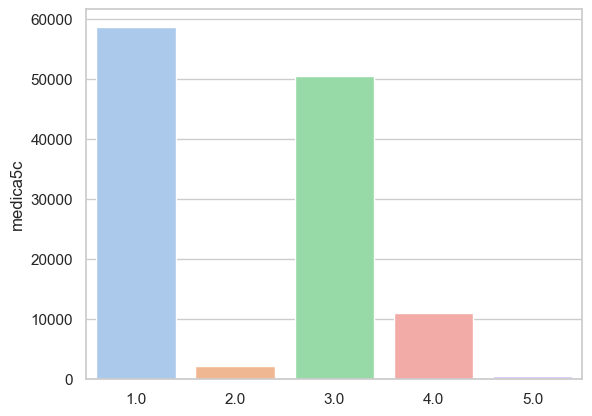

In [24]:
sns.barplot(x = df_k['medica5c'].unique(), y=df_k['medica5c'].value_counts())

In [22]:
tip_con = data_c.copy()
# tip_con['tip_con'] = tip_con['tip_con'].map({0.0:"No aplica",1.0:"Con contrato escrito",2.0:"Temporal",
#                                              3.0:"De base, planta o por tiempo indefinido",
#                                              4.0:"Contrato de tipo no especificado",5.0:"Sin contrato escrito",6.0:"No especificado"})
tip_con['tip_con'].value_counts().reset_index(name="count")

,index,count
0,3.0,43436
1,5.0,39278
2,0.0,30534
3,2.0,8426
4,6.0,898
5,4.0,305


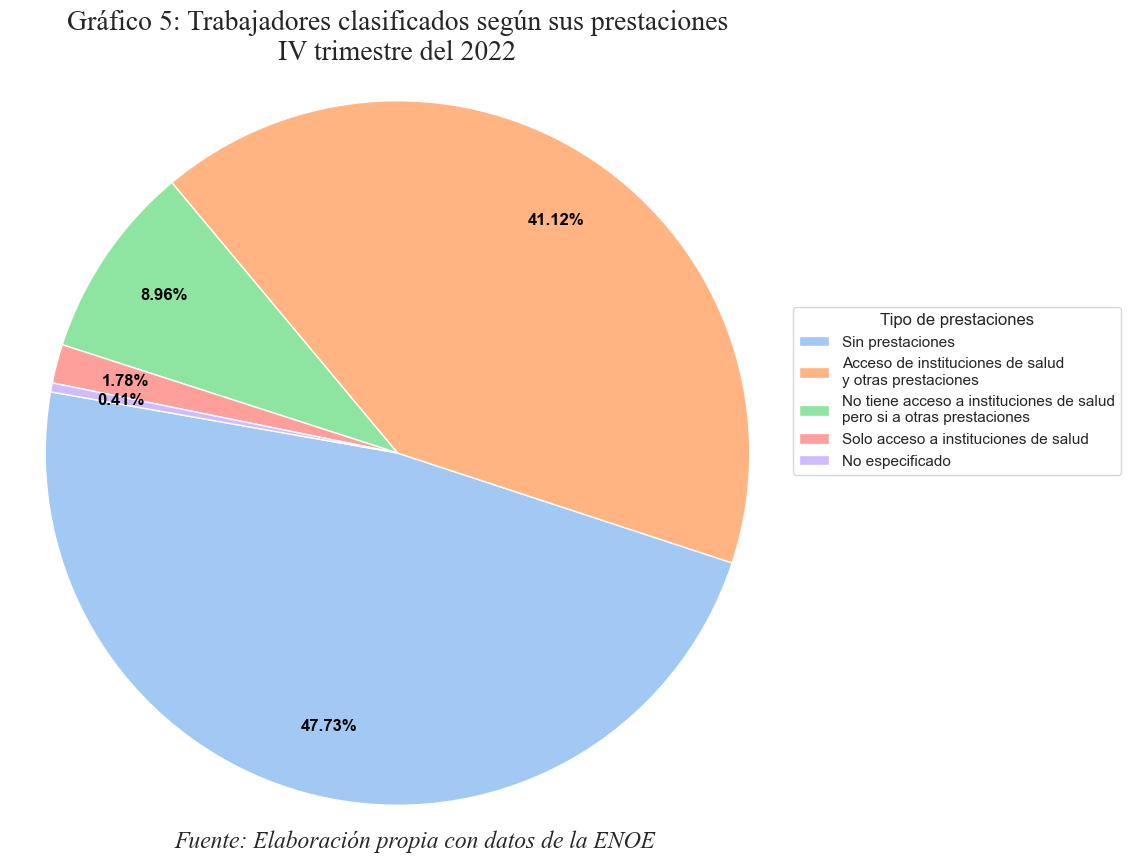

In [25]:
# Prestaciones
import matplotlib.pyplot as plt
medica5c = data_c['medica5c'].value_counts().reset_index(name='count')
medica5c = medica5c.set_axis(['prestaciones','count'], axis=1)
medica5c['prestaciones'] = medica5c['prestaciones'].map({0:"No aplica", 
                                                             1:'Sin prestaciones', 
                                                             2:'Solo acceso a instituciones de salud',
                                                             3:'Acceso de instituciones de salud\n'
                                                         'y otras prestaciones',
                                                             4:'No tiene acceso a instituciones de salud\n'
                                                         'pero si a otras prestaciones', 
                                                             5:'No especificado'})
# explode = (0.08, 0, 0, 0, 0)
fig, ax = plt.subplots(figsize=(10, 10))

wedges, texts, autotexts = ax.pie(medica5c['count'], #explode=explode, 
                                autopct='%1.2f%%', startangle=170,
                                pctdistance=0.80)#, labeldistance=2)

plt.setp(autotexts, size=8, rotation_mode='anchor', ha='center', weight='bold')

for text in texts + autotexts:
    text.set_fontsize(12)  
    text.set_color('black')

ax.axis('equal')
plt.legend(wedges, medica5c['prestaciones'], title="Tipo de prestaciones", loc="best", bbox_to_anchor=(1, 0, 0.2, 0.7))
centre_circle = plt.Circle((0,0),0.90,fc='white')
# fig.gca().add_artist(centre_circle)
# Titulos y pies de gráfico
font_t = {'family': 'Times New Roman', 'fontsize': 20}
font_p = {'family': 'Times New Roman', 'style': 'italic', 'fontsize': 17}
# Titulo
plt.title('Gráfico 5: Trabajadores clasificados según sus prestaciones\n'
          'IV trimestre del 2022', fontdict=font_t)
# Pié de gráfico
plt.figtext(0.53, 0.1, 'Fuente: Elaboración propia con datos de la ENOE', ha='center', fontdict=font_p)
# Guardar imagen
plt.savefig('pie_pres.png', bbox_inches='tight')

In [19]:
import matplotlib.pyplot as plt

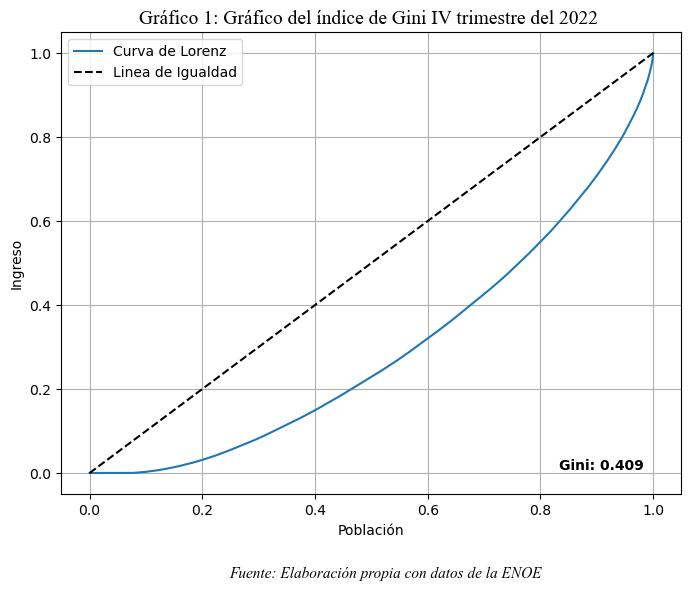

In [20]:
# Filtrar los datos para aquellos donde clase2==1
filtered_data = data_c[data_c['clase2'] == 1]
filtered_data = filtered_data.dropna(subset=['ingocup2'])  # Eliminar filas con valores nulos en 'ingocup2'
# Ordenar los datos de 'ingocup2' de manera ascendente
data_sorted = np.sort(filtered_data['ingocup2'])
# Calcular la curva de Lorenz
n = len(data_sorted)
lorenz_curve = np.cumsum(data_sorted) / np.sum(data_sorted)
gini_index = gini(gini_data['ingocup2'])
# Fonts
font_t = {'family': 'Times New Roman', 'fontsize': 14}
font_p = {'family': 'Times New Roman', 'style': 'italic', 'fontsize': 11}
# Representación de la curva de Lorenz
plt.figure(figsize=(8, 6))
plt.plot(np.linspace(0, 1, n), lorenz_curve, label='Curva de Lorenz')
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Linea de Igualdad')

# Titulo
plt.title('Gráfico 1: Gráfico del índice de Gini IV trimestre del 2022 ', fontdict=font_t)

plt.ylabel('Ingreso')
plt.xlabel('Población')
plt.legend()
plt.grid(True)
# Pié de gráfico
plt.figtext(0.53, -0.03, 'Fuente: Elaboración propia con datos de la ENOE', ha='center', fontdict=font_p)
plt.figtext(0.8, 0.15, f'Gini: {gini_index:.3f}', ha='center', fontdict={'weight':'bold'})

plt.savefig('lorenz_gini.png', bbox_inches='tight')

In [6]:
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq: http://www.statsdirect.com/help/content/image/stat0206_wmf.gif
    # from: http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    array = np.array(array)
    array = array.flatten() #all values are treated equally, arrays must be 1d
    array = array[~np.isnan(array)] # all values that are not Nan
    if np.amin(array) < 0:
        array -= np.amin(array) #values cannot be negative
    array += 0.0000001 #values cannot be 0
    array = np.sort(array) #values must be sorted
    index = np.arange(1,array.shape[0]+1) #index per array element
    n = array.shape[0]#number of array elements
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) #Gini coefficient

In [15]:
gini_data = data_c[(data_c['clase2']==1)]
gini(gini_data['ingocup2'])
# gini_data = base_descrip[(base_descrip['clase2'] == 1)]

0.4092884366872571

In [8]:
def gini_index(x):
    x = np.array(x)
    x = x[~np.isnan(x)]
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))

In [10]:
gini_index(data_c['ingocup2'])

KeyboardInterrupt: 

In [29]:
# t_trab = data["t_tra"].value_counts().reset_index()
pd.crosstab(data["t_tra"], data['sex'] )

sex,1.0,2.0
t_tra,,
1.0,146238,166411
2.0,6374,3847


In [30]:
data['zona'].value_counts().reset_index()

,index,zona
0,2.0,296753
1,1.0,26117
